## Задание 1

[kaggle task](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

Есть датасет с характеристиками покупателей в магазине.
<br>
Требуется разбить покупателей на k кластеров (выбор k остается за тобой), посчитать силуэт и визуализировать полученные кластеры

Выбор k должен быть обоснован, применять можно абсолютно любые алгоритмы.

**Заметка**: можно генерировать новые признаки и/или не использовать все имеющиеся, да и вообще делать все, что угодно и не противоречит здравому смыслу :)

**Не забывай фиксировать random_state для воспроизводимости результатов, где это требуется**

In [1]:
#turn off warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

from pathlib import Path

##other libraries on need##
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram

In [3]:
df = pd.read_csv(Path('..', 'data', 'mall_customers.csv'))
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [5]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


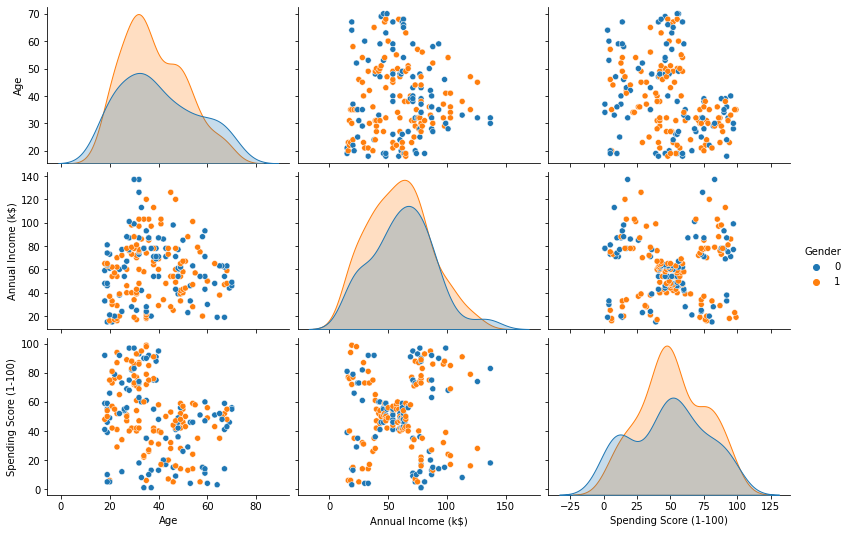

In [7]:
#X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [8]:
#Let's drop Gender and CustomerID
df = df.drop(['CustomerID', 'Gender'], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### K-means

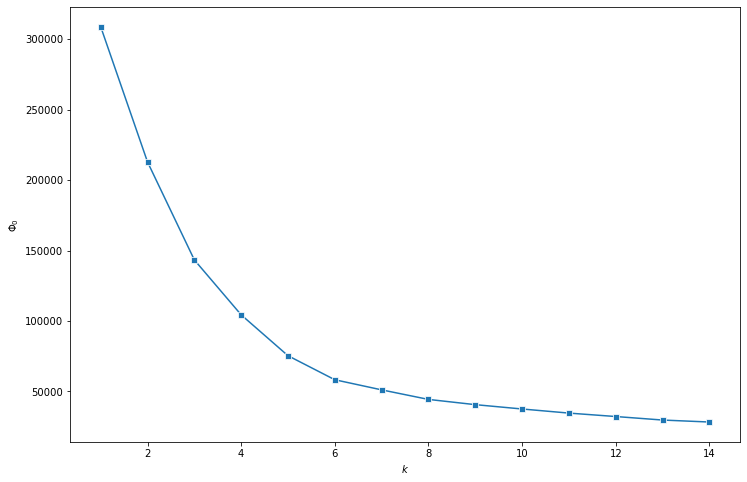

In [9]:
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1, init='k-means++').fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(range(1, 15), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$\Phi_0$');
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, random_state=1, init='k-means++').fit(df)
kmeans_labels = kmeans.labels_

In [11]:
print(f'Silhouette score K-means: {silhouette_score(df, kmeans_labels)}')

Silhouette score K-means: 0.44428597560893024


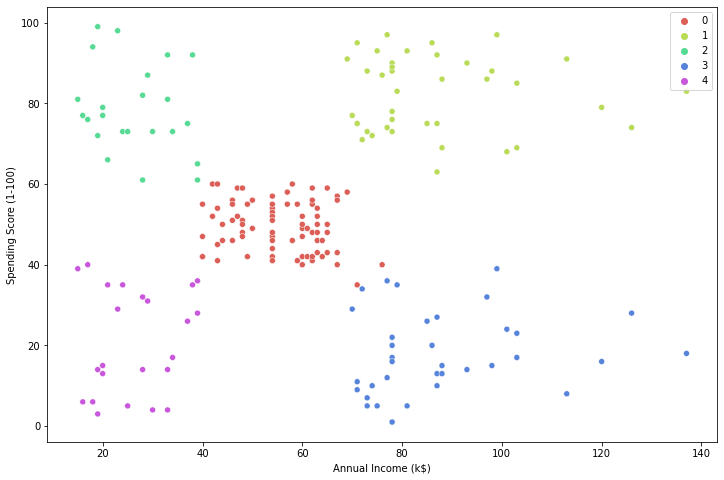

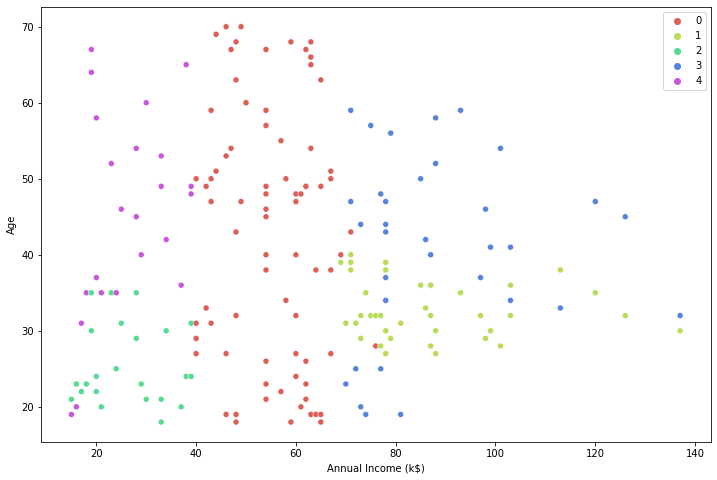

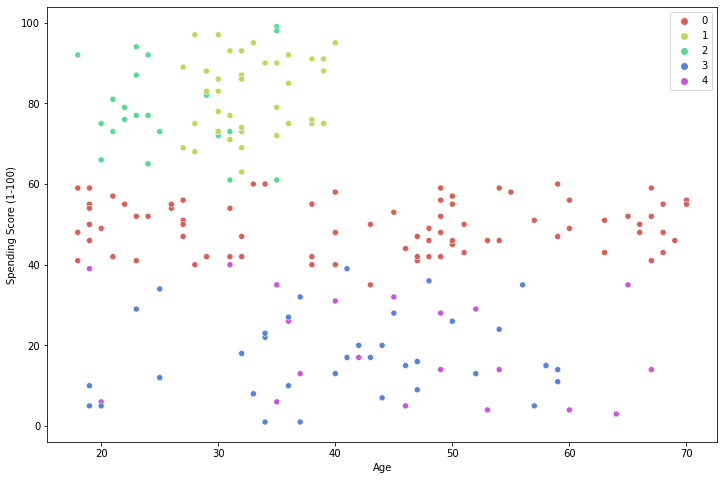

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=kmeans_labels, palette=sns.color_palette('hls', 5))
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Age'], hue=kmeans_labels, palette=sns.color_palette('hls', 5))
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue=kmeans_labels, palette=sns.color_palette('hls', 5))
plt.show()

### DBSCAN

In [13]:
dbscan = DBSCAN(eps=15.5, min_samples=11).fit(df)
dbscan_labels = dbscan.labels_

In [14]:
dbscan_labels

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  2,  1,  2,  3,  2,  3,  2,  1,  2, -1,  2,
        3,  2, -1,  2,  3,  2,  1,  2, -1,  2,  1,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  1,  2, -1,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2, -1,  2, -1,  2,  3,  2, -1,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [15]:
print(f'Silhouette score DBSCAN: {silhouette_score(df, dbscan_labels)}')

Silhouette score DBSCAN: 0.27365885120964345


In [16]:
dbscan_num = np.unique(dbscan_labels).size

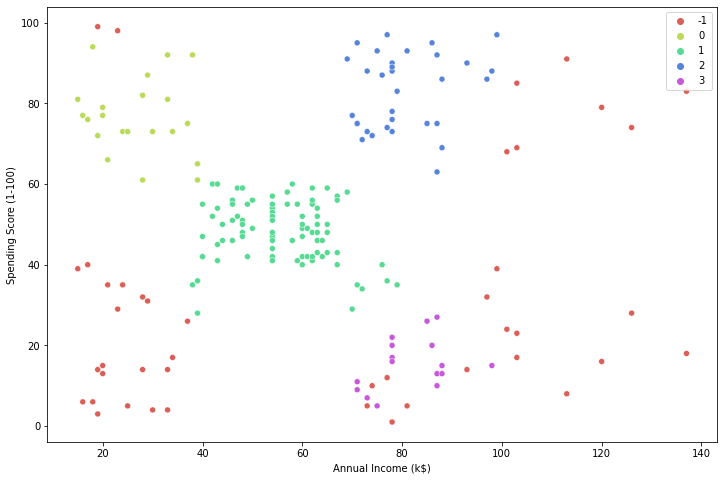

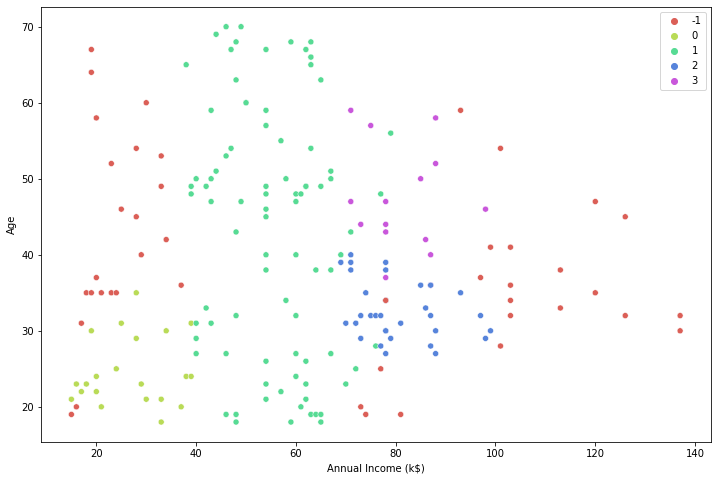

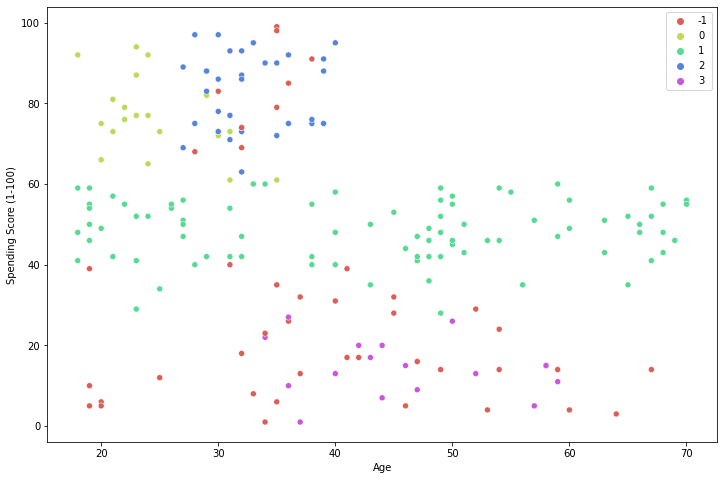

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=dbscan_labels, palette=sns.color_palette('hls', dbscan_num))
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Age'], hue=dbscan_labels, palette=sns.color_palette('hls', dbscan_num))
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue=dbscan_labels, palette=sns.color_palette('hls', dbscan_num))
plt.show()

### Agglomerative Clustering

In [18]:
agclust = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df)
agclust_labels = agclust.labels_

In [19]:
print(f'Silhouette score Agglomerative Clustering: {silhouette_score(df, agclust_labels)}')

Silhouette score Agglomerative Clustering: 0.43542057757306424


In [20]:
agclust_num = np.unique(dbscan_labels).size

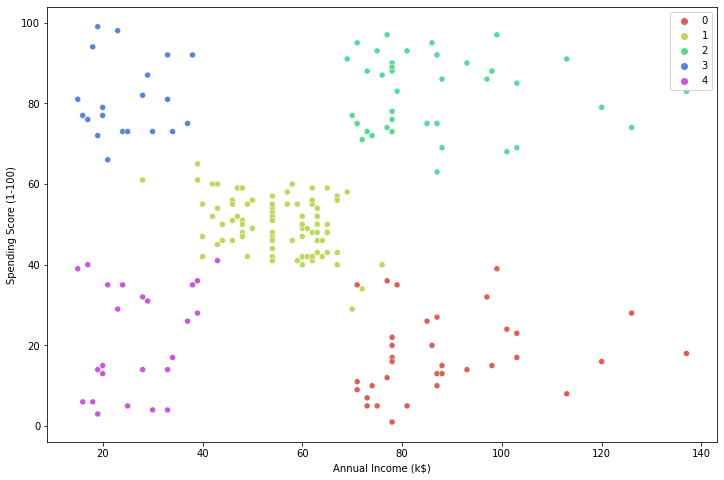

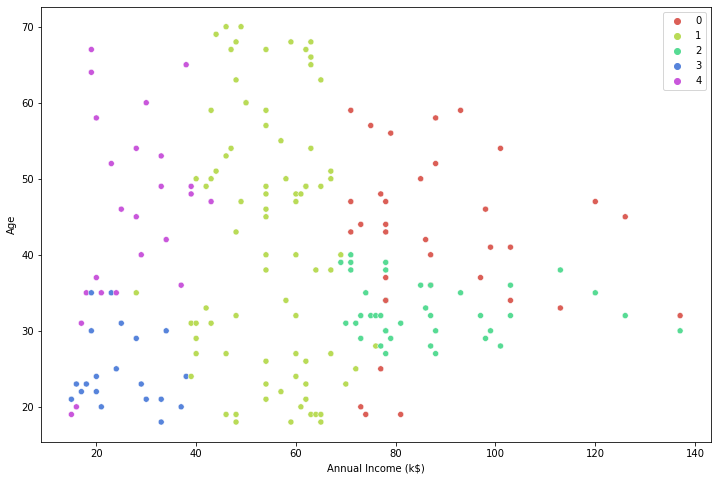

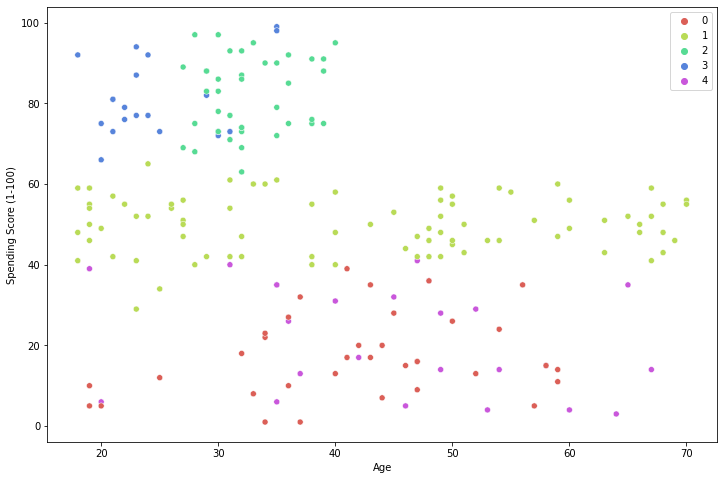

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=agclust_labels, palette=sns.color_palette('hls', agclust_num))
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Age'], hue=agclust_labels, palette=sns.color_palette('hls', agclust_num))
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue=agclust_labels, palette=sns.color_palette('hls', agclust_num))
plt.show()